In [1]:
# --- a. Import the necessary packages ---

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [3]:
def load_and_preprocess_data(filepath, num_classes=10):

    # 1. Load the dataset
    print(f"Loading data from: {filepath}...")
    data = pd.read_csv(filepath)

    # 2. Separate features (pixels) and target (label)
    X = data.iloc[:, :-1].values.astype('float32') # Pixel data starts from the second column
    y = data['label'].values

    # 3. Normalise the pixel data: Scale to the range [0, 1]
    # MNIST pixels are 0 to 255 (unsigned 8-bit integers)
    X /= 255.0

    # 4. One-hot encode the target labels (e.g., 5 -> [0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
    y = to_categorical(y, num_classes=num_classes)

    return X, y

In [ ]:
# --- b. Load the training and testing data ---
X_train, y_train = load_and_preprocess_data(r"C:\Users\hp\OneDrive\Desktop\LP4\CIFR\CIFR_Ass2_and_Ass3\train_data.csv")
X_test, y_test = load_and_preprocess_data(r"C:\Users\hp\OneDrive\Desktop\LP4\CIFR\CIFR_Ass2_and_Ass3\test_data.csv")

Loading data from: C:\Users\hp\OneDrive\Desktop\LP4\CIFR\CIFR_Ass2_and_Ass3\train_data.csv...


In [8]:
# --- c. Define the network architecture using Keras ---
# The CIFAR-10 image is 32x32x3 = 3072 pixels.
# The Sequential model defines a linear stack of layers.
model = Sequential()
model.add(Flatten(input_shape = (3072,)))
model.add(Dense(512, activation = "relu", name = "Hidden_Layer_1"))
model.add(Dense(256, activation = "relu", name = "Hidden_Layer_2"))
model.add(Dense(10, activation = "softmax", name = "Output_Layer"))

In [9]:
# Compile the model
# We use categorical crossentropy because the labels are one-hot encoded
sgd = SGD(0.01)
model.compile(loss = "categorical_crossentropy", optimizer = sgd, metrics = ["accuracy"])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_1 (Dense)          │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# --- d. Train the model using SGD with 11 epochs ---
epochs = 11
H = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = epochs, batch_size = 128)

Epoch 1/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.2997 - loss: 1.9807 - val_accuracy: 0.3524 - val_loss: 1.8498
Epoch 2/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.3652 - loss: 1.8098 - val_accuracy: 0.3742 - val_loss: 1.7798
Epoch 3/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.3919 - loss: 1.7414 - val_accuracy: 0.3772 - val_loss: 1.7568
Epoch 4/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.4077 - loss: 1.6941 - val_accuracy: 0.4091 - val_loss: 1.6794
Epoch 5/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.4236 - loss: 1.6515 - val_accuracy: 0.4059 - val_loss: 1.6869
Epoch 6/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.4349 - loss: 1.6176 - val_accuracy: 0.4299 - val_loss: 1.6245
Epoch 7/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.4432 - loss: 1.5904 - val_accuracy: 0.4324 - val_loss: 1.6117
Epoch 8/11
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4542 - loss: 1.5641 - val_acc

In [11]:
# --- e. Evaluate the network ---

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Loss: 1.5271
Test Accuracy: 46.36%


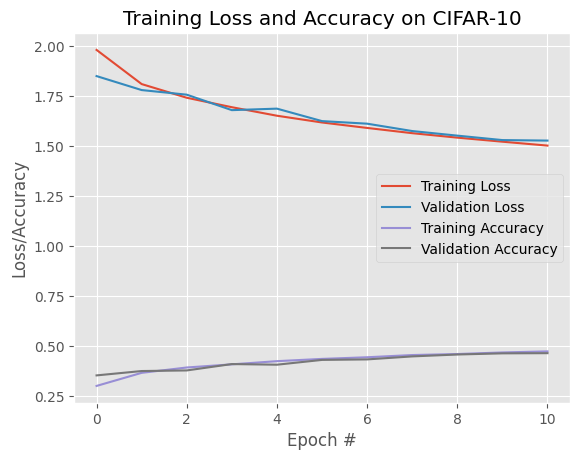

In [12]:
# --- f. Plot the training loss and accuracy ---

plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0, 11), H.history["loss"], label="Training Loss")
plt.plot(np.arange(0, 11), H.history["val_loss"], label="Validation Loss")
plt.plot(np.arange(0, 11), H.history["accuracy"], label="Training Accuracy")
plt.plot(np.arange(0, 11), H.history["val_accuracy"], label="Validation Accuracy")

plt.title("Training Loss and Accuracy on CIFAR-10")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()